In [93]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from scipy.special import erfc
from functools import partial

### Leaky ReLU
when $\alpha$ decide how big is leak 

In [4]:
z = np.linspace(-5, 5, 200)
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

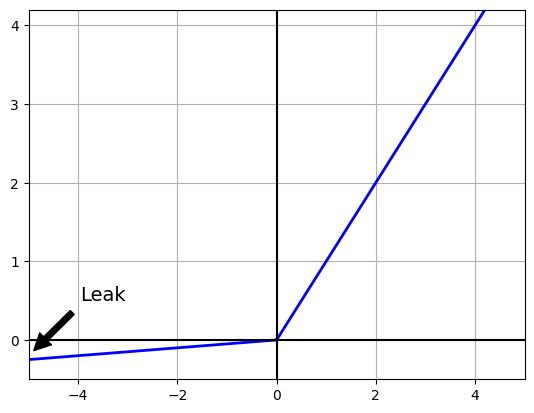

In [5]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [7]:
[m for m in dir(keras.activations) if not m.startswith("_")] # different activation functions

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [8]:
[m for m in dir(keras.layers) if "relu" in m.lower()] # avaliable versions of RELU 

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

MNIST dataset

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"), # we need HE inicialization in order to use LeakyRelu
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.2987 - accuracy: 0.6153 - val_loss: 0.8588 - val_accuracy: 0.7302
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7710 - accuracy: 0.7568 - val_loss: 0.6857 - val_accuracy: 0.7812
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6599 - accuracy: 0.7866 - val_loss: 0.6231 - val_accuracy: 0.7944
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6050 - accuracy: 0.8013 - val_loss: 0.5733 - val_accuracy: 0.8142
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5706 - accuracy: 0.8097 - val_loss: 0.5459 - val_accuracy: 0.8196
Epoch 6/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5461 - accuracy: 0.8159 - val_loss: 0.5259 - val_accuracy: 0.8266
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5275 - accuracy: 0.8210 - val_loss: 0.5088 - val_accuracy:

### PReLU
when $\alpha$ (of leak) is learning with model 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [15]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4816 - accuracy: 0.8340 - val_loss: 0.4708 - val_accuracy: 0.8402
Epoch 2/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4738 - accuracy: 0.8363 - val_loss: 0.4637 - val_accuracy: 0.8426
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4667 - accuracy: 0.8386 - val_loss: 0.4679 - val_accuracy: 0.8316
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4607 - accuracy: 0.8402 - val_loss: 0.4519 - val_accuracy: 0.8446
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4555 - accuracy: 0.8429 - val_loss: 0.4468 - val_accuracy: 0.8438
Epoch 6/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4503 - accuracy: 0.8438 - val_loss: 0.4427 - val_accuracy: 0.8472
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4456 - accuracy: 0.8462 - val_loss: 0.4378 - val_accuracy:

### ELU

In [16]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

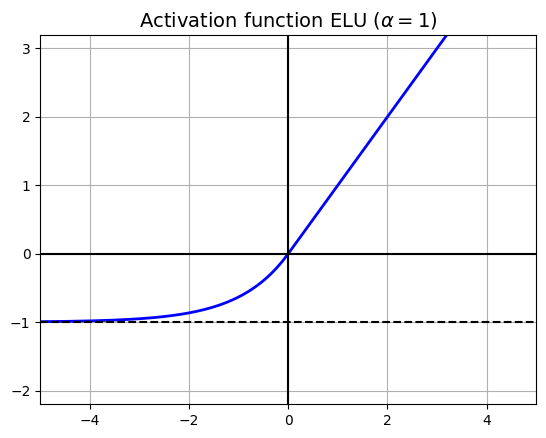

In [17]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"Activation function ELU ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [19]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu"),
    keras.layers.Dense(100, activation="elu"),
    keras.layers.Dense(10, activation="elu"),
])

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 2.0617 - accuracy: 0.1337 - val_loss: 1.4814 - val_accuracy: 0.0916
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 1.4434 - accuracy: 0.1150 - val_loss: 1.5882 - val_accuracy: 0.1542
Epoch 3/10
1719/1719 [==============================] - 3s 1ms/step - loss: 1.5505 - accuracy: 0.1638 - val_loss: 1.6085 - val_accuracy: 0.1518
Epoch 4/10
1719/1719 [==============================] - 3s 1ms/step - loss: 1.6300 - accuracy: 0.1405 - val_loss: 1.5351 - val_accuracy: 0.1698
Epoch 5/10
1719/1719 [==============================] - 3s 1ms/step - loss: 1.5527 - accuracy: 0.1945 - val_loss: 1.4358 - val_accuracy: 0.2842
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.4181 - accuracy: 0.3744 - val_loss: 1.3119 - val_accuracy: 0.3868
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 1.2496 - accuracy: 0.4543 - val_loss: 1.1981 - val_accuracy:

### SeLU
The alpha and scale variables are for self-normalization with a mean of 0 and a standard deviation of 1

In [23]:
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [24]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

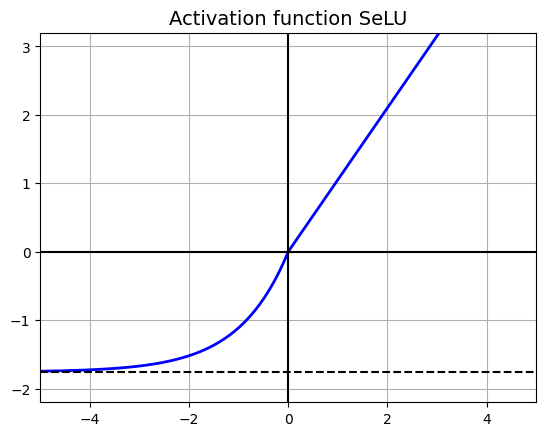

In [25]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("Activation function SeLU", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

Fashion MNIST example

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

Standarization to mean = 0 and stds = 1

In [29]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [30]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 20s 9ms/step - loss: 1.0183 - accuracy: 0.6110 - val_loss: 0.7401 - val_accuracy: 0.7290
Epoch 2/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.6650 - accuracy: 0.7504 - val_loss: 0.9941 - val_accuracy: 0.6580
Epoch 3/5
1719/1719 [==============================] - 16s 9ms/step - loss: 0.6716 - accuracy: 0.7606 - val_loss: 0.5554 - val_accuracy: 0.8100
Epoch 4/5
1719/1719 [==============================] - 16s 9ms/step - loss: 0.5613 - accuracy: 0.8066 - val_loss: 0.6774 - val_accuracy: 0.7728
Epoch 5/5
1719/1719 [==============================] - 16s 10ms/step - loss: 0.5534 - accuracy: 0.8119 - val_loss: 0.5066 - val_accuracy: 0.8248


ReLU version to compare

In [31]:
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [34]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 22s 10ms/step - loss: 1.9658 - accuracy: 0.2331 - val_loss: 1.7382 - val_accuracy: 0.3422
Epoch 2/5
1719/1719 [==============================] - 16s 9ms/step - loss: 1.6376 - accuracy: 0.3583 - val_loss: 1.4693 - val_accuracy: 0.4258
Epoch 3/5
1719/1719 [==============================] - 15s 9ms/step - loss: 1.2818 - accuracy: 0.4819 - val_loss: 1.1430 - val_accuracy: 0.5328
Epoch 4/5
1719/1719 [==============================] - 15s 9ms/step - loss: 1.0495 - accuracy: 0.5966 - val_loss: 1.1422 - val_accuracy: 0.5302
Epoch 5/5
1719/1719 [==============================] - 16s 9ms/step - loss: 0.8407 - accuracy: 0.6885 - val_loss: 0.9457 - val_accuracy: 0.6798


In the ReLU version we got problem of vanishing/exploding gradients. So SeLU is much better here.

### Bach Normalization
We can put unnormalized data to model and our mean and std will calculate after every group of dataset. In order to make it faster, we should overwrite calculated parameters in finall model. 

In [35]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [38]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [39]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8891 - accuracy: 0.7085 - val_loss: 0.5592 - val_accuracy: 0.8100
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5813 - accuracy: 0.8001 - val_loss: 0.4750 - val_accuracy: 0.8376
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5216 - accuracy: 0.8191 - val_loss: 0.4386 - val_accuracy: 0.8480
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4842 - accuracy: 0.8312 - val_loss: 0.4151 - val_accuracy: 0.8556
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4583 - accuracy: 0.8396 - val_loss: 0.4008 - val_accuracy: 0.8626
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4405 - accuracy: 0.8452 - val_loss: 0.3887 - val_accuracy: 0.8670
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4255 - accuracy: 0.8517 - val_loss: 0.3781 - val_accuracy:

We can use no_bias to not to waste parameters, which contains BachNormalization

In [40]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [41]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [42]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 2ms/step - loss: 1.0291 - accuracy: 0.6743 - val_loss: 0.6617 - val_accuracy: 0.7902
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6681 - accuracy: 0.7822 - val_loss: 0.5436 - val_accuracy: 0.8240
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5869 - accuracy: 0.8046 - val_loss: 0.4901 - val_accuracy: 0.8436
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5366 - accuracy: 0.8186 - val_loss: 0.4570 - val_accuracy: 0.8468
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5038 - accuracy: 0.8284 - val_loss: 0.4358 - val_accuracy: 0.8552
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4829 - accuracy: 0.8340 - val_loss: 0.4187 - val_accuracy: 0.8578
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4659 - accuracy: 0.8395 - val_loss: 0.4059 - val_accuracy:

### Gradient clipping

In [43]:
optimizer = keras.optimizers.SGD(clipvalue=1.0) 
# example: [0.9, 100, 0] ---> [0.9, 1, 0]

In order to keep vector direction

In [44]:
optimizer = keras.optimizers.SGD(clipnorm=1.0) # this clip gradient when L2 norm is bigger then treshold
# example: [0.9, 100] ---> [0.00899964, 0.9999595]

### Transfer Learning
Repeated use of ready-made layers

Example at MNIST DATASET - this is just to look how it works, but shouldnt be use at such small networks like this one, this works great at very big deep learning models

In [45]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # shoes or t=shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # reindex classes  7., 8., 9. --->  5., 6., 7.
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification: is it t-shirt? (class 6.)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [47]:
print(f"X_train_A shape:{X_train_A.shape}")
print(f"X_train_B shape:{X_train_B.shape}")

X_train_A shape:(43986, 28, 28)
X_train_B shape:(200, 28, 28)


In [48]:
tf.random.set_seed(42)
np.random.seed(42)

Training bigger model

In [49]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [50]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [51]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.5865 - accuracy: 0.8171 - val_loss: 0.3907 - val_accuracy: 0.8640
Epoch 2/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3540 - accuracy: 0.8789 - val_loss: 0.3257 - val_accuracy: 0.8869
Epoch 3/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3166 - accuracy: 0.8909 - val_loss: 0.2980 - val_accuracy: 0.8991
Epoch 4/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2973 - accuracy: 0.8980 - val_loss: 0.2836 - val_accuracy: 0.9026
Epoch 5/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2843 - accuracy: 0.9024 - val_loss: 0.2740 - val_accuracy: 0.9076
Epoch 6/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2747 - accuracy: 0.9061 - val_loss: 0.2705 - val_accuracy: 0.9086
Epoch 7/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2668 - accuracy: 0.9087 - val_loss: 0.2651 - val_accuracy:

In [52]:
model_A.save("model_A.h5")

Training smaller model

In [53]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [54]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [55]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 29ms/step - loss: 1.0477 - accuracy: 0.5050 - val_loss: 0.8197 - val_accuracy: 0.5284
Epoch 2/20
7/7 [==============================] - 0s 11ms/step - loss: 0.7548 - accuracy: 0.5650 - val_loss: 0.6070 - val_accuracy: 0.6694
Epoch 3/20
7/7 [==============================] - 0s 11ms/step - loss: 0.5595 - accuracy: 0.7400 - val_loss: 0.4819 - val_accuracy: 0.7901
Epoch 4/20
7/7 [==============================] - 0s 10ms/step - loss: 0.4426 - accuracy: 0.8200 - val_loss: 0.3961 - val_accuracy: 0.8732
Epoch 5/20
7/7 [==============================] - 0s 10ms/step - loss: 0.3606 - accuracy: 0.8750 - val_loss: 0.3376 - val_accuracy: 0.9128
Epoch 6/20
7/7 [==============================] - 0s 12ms/step - loss: 0.3021 - accuracy: 0.9300 - val_loss: 0.2938 - val_accuracy: 0.9310
Epoch 7/20
7/7 [==============================] - 0s 11ms/step - loss: 0.2592 - accuracy: 0.9550 - val_loss: 0.2602 - val_accuracy: 0.9442
Epoch 8/20
7/7 [===========

Smaller model (B) build on bigger one (A)

In [57]:
model_A = keras.models.load_model("model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [58]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [59]:
for layer in model_B_on_A.layers[:-1]: # we dont want to train new weights of layers
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [60]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 25ms/step - loss: 2.6784 - accuracy: 0.1000 - val_loss: 2.4415 - val_accuracy: 0.1501
Epoch 2/4
7/7 [==============================] - 0s 10ms/step - loss: 2.4840 - accuracy: 0.1300 - val_loss: 2.2647 - val_accuracy: 0.1785
Epoch 3/4
7/7 [==============================] - 0s 10ms/step - loss: 2.3006 - accuracy: 0.1500 - val_loss: 2.1012 - val_accuracy: 0.1998
Epoch 4/4
7/7 [==============================] - 0s 9ms/step - loss: 2.1313 - accuracy: 0.1750 - val_loss: 1.9459 - val_accuracy: 0.2181
Epoch 1/16
7/7 [==============================] - 1s 28ms/step - loss: 1.6752 - accuracy: 0.2750 - val_loss: 1.1490 - val_accuracy: 0.4229
Epoch 2/16
7/7 [==============================] - 0s 10ms/step - loss: 0.9810 - accuracy: 0.4900 - val_loss: 0.6988 - val_accuracy: 0.6065
Epoch 3/16
7/7 [==============================] - 0s 10ms/step - loss: 0.6026 - accuracy: 0.6650 - val_loss: 0.4704 - val_accuracy: 0.7637
Epoch 4/16
7/7 [================

Summary

In [61]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.1201 - accuracy: 0.9775


[0.12009943276643753, 0.9775000214576721]

In [63]:
model_B_on_A.evaluate(X_test_B, y_test_B) # winner 

63/63 [==============================] - 0s 1ms/step - loss: 0.0956 - accuracy: 0.9795


[0.09563202410936356, 0.9794999957084656]

### Faster optimizers

**Momentum optimization** \
Almost always is better then gradient_descent - best value is 0.9 

In [65]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

**Algorithm Nesterova (Nesterov accelerated gradient)** \
Almost always is better hen Momentum optimization

In [67]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

**AdaGrad** \
Not best for deep learning networks, but works good witih linear regression etc. Using adaptive learning rate

In [69]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

**RMSProp** \
Almost always got better rezults then AdaGrad.

In [71]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

**Adam** \
Combination of momentum and RMSProp.

In [73]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

**AdaMax** \
Simpler version of Adam. Worth to test if Adam dont works the best.

In [74]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

**Nadam** \
Faster version of Adam, combine with Nesterov trick

In [75]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### Learning rate scheduling

Power Scheduling

In [77]:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=1e-4)

In [78]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [79]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4871 - accuracy: 0.8289 - val_loss: 0.4024 - val_accuracy: 0.8584
Epoch 2/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3775 - accuracy: 0.8664 - val_loss: 0.3710 - val_accuracy: 0.8684
Epoch 3/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3449 - accuracy: 0.8767 - val_loss: 0.3745 - val_accuracy: 0.8664
Epoch 4/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3246 - accuracy: 0.8839 - val_loss: 0.3547 - val_accuracy: 0.8766
Epoch 5/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3097 - accuracy: 0.8893 - val_loss: 0.3465 - val_accuracy: 0.8772
Epoch 6/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2964 - accuracy: 0.8941 - val_loss: 0.3454 - val_accuracy: 0.8786
Epoch 7/25
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2863 - accuracy: 0.8973 - val_loss: 0.3420 - val_accuracy:

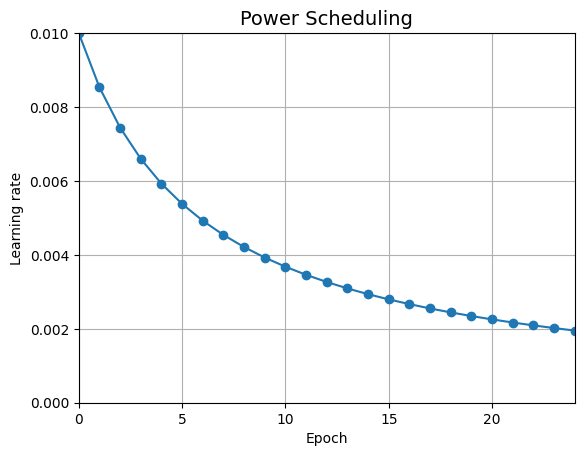

In [80]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

Exponential Scheduling

In [81]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [82]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [83]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [84]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7189 - accuracy: 0.7859 - val_loss: 0.7355 - val_accuracy: 0.7884 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6302 - accuracy: 0.8089 - val_loss: 0.5781 - val_accuracy: 0.8162 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5764 - accuracy: 0.8209 - val_loss: 0.6653 - val_accuracy: 0.7926 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5322 - accuracy: 0.8339 - val_loss: 0.5047 - val_accuracy: 0.8578 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5079 - accuracy: 0.8442 - val_loss: 0.5277 - val_accuracy: 0.8512 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4361 - accuracy: 0.8636 - val_loss: 0.5631 - val_accuracy: 0.8564 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 4s

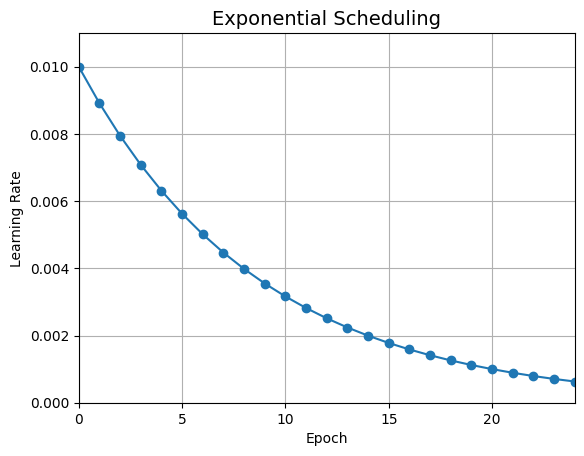

In [85]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

Piecewise constant scheduling

In [86]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [87]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [88]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7319 - accuracy: 0.7807 - val_loss: 0.6296 - val_accuracy: 0.8092 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7147 - accuracy: 0.7891 - val_loss: 0.7329 - val_accuracy: 0.7968 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8170 - accuracy: 0.7597 - val_loss: 1.5317 - val_accuracy: 0.6028 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8966 - accuracy: 0.7034 - val_loss: 0.8397 - val_accuracy: 0.7538 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9624 - accuracy: 0.6958 - val_loss: 0.8444 - val_accuracy: 0.7096 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6374 - accuracy: 0.7786 - val_loss: 0.7488 - val_accuracy: 0.7406 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 4s

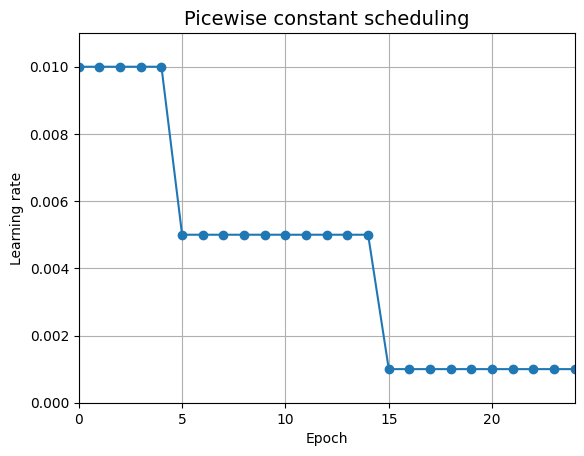

In [89]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning rate")
plt.title("Picewise constant scheduling", fontsize=14)
plt.grid(True)
plt.show()

Performence Scheduling

In [90]:
tf.random.set_seed(42)
np.random.seed(42)

In [91]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4780 - accuracy: 0.8312 - val_loss: 0.3761 - val_accuracy: 0.8632 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3624 - accuracy: 0.8687 - val_loss: 0.3927 - val_accuracy: 0.8600 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3273 - accuracy: 0.8800 - val_loss: 0.3454 - val_accuracy: 0.8740 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3063 - accuracy: 0.8883 - val_loss: 0.3483 - val_accuracy: 0.8804 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.8961 - val_loss: 0.3461 - val_accuracy: 0.8820 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9011 - val_loss: 0.4023 - val_accuracy: 0.8736 - lr: 0.0100
Epoch 7/25
1719/1719 [==============================] - 3s

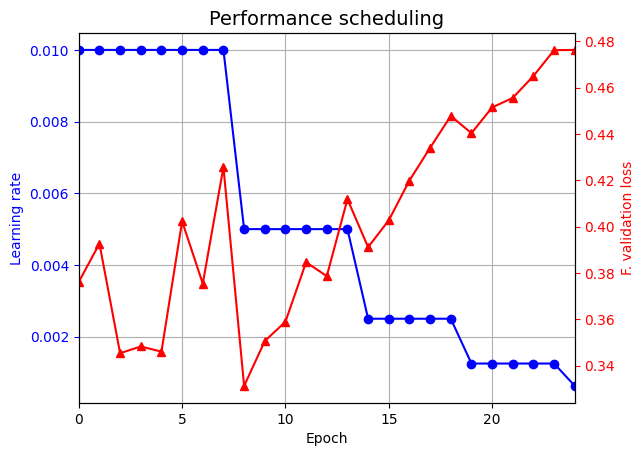

In [92]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('F. validation loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Performance scheduling", fontsize=14)
plt.show()

### Regularization

Regularization $\ell_1$ i $\ell_2$

In [94]:
RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))  # we can use it in order to have less code

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 5s 2ms/step - loss: 1.6485 - accuracy: 0.8145 - val_loss: 0.7048 - val_accuracy: 0.8416
Epoch 2/2
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7182 - accuracy: 0.8280 - val_loss: 0.6897 - val_accuracy: 0.8356


Dropout

In [95]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5737 - accuracy: 0.8025 - val_loss: 0.3677 - val_accuracy: 0.8686
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4235 - accuracy: 0.8448 - val_loss: 0.3422 - val_accuracy: 0.8712


Dropout Alpha - when we are using SELU activation function

In [96]:
tf.random.set_seed(42)
np.random.seed(42)

In [98]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6608 - accuracy: 0.7611 - val_loss: 0.5971 - val_accuracy: 0.8366
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5565 - accuracy: 0.7946 - val_loss: 0.5398 - val_accuracy: 0.8520
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5261 - accuracy: 0.8059 - val_loss: 0.5167 - val_accuracy: 0.8554
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5063 - accuracy: 0.8138 - val_loss: 0.4691 - val_accuracy: 0.8652
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4904 - accuracy: 0.8186 - val_loss: 0.4532 - val_accuracy: 0.8640
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4845 - accuracy: 0.8206 - val_loss: 0.4812 - val_accuracy: 0.8594
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4713 - accuracy: 0.8253 - val_loss: 0.4705 - val_accuracy:

In [99]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4690 - accuracy: 0.8594


[0.4689555764198303, 0.8593999743461609]

In [100]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 2s 1ms/step - loss: 0.3440 - accuracy: 0.8828


[0.34402957558631897, 0.8828181624412537]

In [101]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 4s 3ms/step - loss: 0.4183 - accuracy: 0.8436


Monte Carlo Dropout

In [102]:
tf.random.set_seed(42)
np.random.seed(42)

In [103]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [104]:
np.round(model.predict(X_test_scaled[:1]), 2)

1/1 [==============================] - 0s 107ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98]],
      dtype=float32)

In [105]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.37, 0.  , 0.32, 0.  , 0.31]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.37, 0.  , 0.6 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.07, 0.  , 0.89]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.14, 0.  , 0.85]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.3 , 0.  , 0.52, 0.  , 0.18]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.33, 0.  , 0.2 , 0.  , 0.48]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.21, 0.  , 0.7 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.37, 0.  , 0.61]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.02, 0.  , 0.84]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.21, 0.  , 0.74]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.  , 0.07, 0.  , 0.71]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.19, 0.  , 0

In [106]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.25, 0.  , 0.63]],
      dtype=float32)

MAX-Norm regularization

In [107]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [108]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 7s 3ms/step - loss: 0.4692 - accuracy: 0.8339 - val_loss: 0.3673 - val_accuracy: 0.8708
Epoch 2/2
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3571 - accuracy: 0.8699 - val_loss: 0.3895 - val_accuracy: 0.8616
